Contents
  - <a href='#Feasibility-of-ammonia-aqua-chiller'>Feasibility of ammonia-aqua chiller¶</a>
    - <a href='#Definitions'>Definitions¶</a>
      - <a href='#Generator/desorber'>Generator/desorber¶</a>
      - <a href='#Rectifier:'>Rectifier:¶</a>
      - <a href='#Absorber:'>Absorber:¶</a>
      - <a href='#Other-assumptions'>Other assumptions¶</a>
    - <a href='#Constraints'>Constraints¶</a>
      - <a href='#Initial-inputs'>Initial inputs¶</a>
      - <a href='#Absorber'>Absorber¶</a>
      - <a href='#Generator'>Generator¶</a>
      - <a href='#Rectifier'>Rectifier¶</a>
    - <a href='#Implementation'>Implementation¶</a>
    - <a href='#Appendix'>Appendix¶</a>
      - <a href='#Visualize-relations-between-a-few-variables-of-state'>Visualize relations between a few variables of state¶</a>


# Feasibility of ammonia-aqua chiller

In [3]:
%%html
<img src="../img/Diagram_for_ammonia.svg">

## Definitions

- $T_{evap}$ : temperature at evaporator outlet (point 13)
- $T_{cond}$ : temperature at condenser outlet (point 10)
- $T_{abs}$ : Temperature at absorber liquid outlet (point 1)
- $T_{gen}$ : Temperature at generator liquid outlet (point 4)
- $T_{rect}$ : Temperature at rectifier vapor outlet (point 9)
- $x_{refrig}$ : The ammonia mass fraction in the refrigerant stream (points 9, 10, 11, 12, 13, 14)
- $x_{rich}$ : The ammonia mass fraction in the rich stream (points 1, 2, 3, 3')
- $x_{weak}$ : The ammonia mass fraction in the weak stream (points 4, 5, 6)
- $Qu_{evap}$ : the vapor quality at the evaporator outlet (point 13) (typically less than 1 because there is some water in the refrigerant)

### Generator/desorber

- Assumptions are designed to give the "best case" of performance.
- Assumption: vapor produced in the desorber is everywhere locally in equilibrium with the liquid.
- Assumption: vapor flows counter to liquid, ie. from near point 4 toward point 3', so all vapor going to rectifier comes from near point 3'. This assumption affects the computation of the heat vs temperature demand curve in the desorber HX.
- Point 3 : Rich stream entering desorber, typically subcooled.
- Point 3' : The point in the rich stream where external heating brings it to saturated state (Qu=0).
- Unnamed point : The vapor stream
- Point 8 : The vapor stream leaving the desorber and entering the rectifier.
- Point 7 : The reflux (liquid) returned from the rectifier to the desorber.

### Rectifier:

- Assumptions are designed to give the best case of performance, equivalent to design with infinite number of plates and size.
- Assumption: liquid formed is everywhere locally in equilibrium with vapor, and flowing counter to it. This assumption affects the computation of the heat vs temperature demand curve.
- Vapor stream starts at point 8 and exits at point 9.
- Liquid stream starts at (unnamed point in equilibrium with point 9) and exits at point 7.

### Absorber:

- Assumption : vapor absorbed is everywhere locally in equilibrium with liquid (or absorbs into subcooled liquid with no resistance) and flowing counter to it.
- Point 1 : Liquid outlet at equilibrium with refrigerant vapor inlet (point 14).
- Assumption : Computation of the heat rejection demand vs temperature curve in the absorber stream (for HX calculations) depends on the weak stream inlet state (point 6) as follows:
  - If it is subcooled, then there is an imagined segment of the process near the weak inlet where the liquid stream absorbs refrigerant without any demand for heat rejection, until the liquid stream reaches saturation and equilibrium.
  - Saturated liquid : The vapor-liquid interface extends through the entire absorber. Absorbing an incremental amount of vapor requires an amount of heat rejection depending on the local equilibrium state and mass flow rates of liquid and vapor.
  - Partially vapor : there is an imagined segment of the absorber near the weak stream inlet where the weak stream just rejects heat via the HX and does not absorb any vapor. Throughout that process, the liquid and vapor are in equilibrium and are represented by one state with the mass fraction of the weak stream. Upon reaching a saturated liquid state, the weak stream enters the main segment of the absorber and begins to absorb from the refrigerant stream.
  - All vapor : there is clearly a problem with the design. But nevertheless, I cool the weak stream all the way to saturated liquid state, just as for partial vapor at inlet.

### Other assumptions

- For purpose of this feasibility question, neglect friction losses and resulting pressure changes.

## Constraints

There are some necessary conditions for the chiller to produce refrigerant flow. I'll try to write these as inequalities, so that we can develop constraint functions that can be used in a solver or optimizer. Drawing a cycle may be feasible for cases with equality, but to actually produce cooling and compute positive mass flow, the inequalities must hold strictly.

### Initial inputs
We assume that $Qu_{evap}$, $x_{refrig}$, $T_{evap}$, and $T_{cond}$ are given. Clearly, we must require that

* $T_{evap} \le T_{cond}$
* $T_{cond}$ less that critical temperature at x_refrig
* $T_{evap}$ greater than freezing temperature at x_refrig

Then we'll compute $P_{evap}$ and $P_{cond}$ from the other inputs.

### Absorber

This is the heart of the cooling cycle, as the absorber is the component that draws a low pressure on the evaporator. At first look, we can constrain the total pressure: $P_{vapor,absorber} \le P_{evap}$. That is,

* $P(T=T_{abs}, x=x_{rich}, Qu=0) \le P_{evap}$

Since the state function is monotonic and increasing wrt. T and x inputs (decreasing wrt. Qu), we could try re-writing alternate forms:

* $ x_{rich,max} := x(T=T_{abs}, P=P_{evap}, Qu=0) \ge x_{rich} $
* $ T(P=P_{evap}, x=x_{rich}, Qu=0) \ge T_{abs} $
* $ Qu(T=T_{abs}, P=P_{evap}, x=x_{rich}) \le 0 $

Since we have not previously determined $x_{rich}$, we can use the constraint limiting it to define $x_{rich,max}$.

Note that the refrigerant vapor coming into the absorber will not be in equilibrium with the rich liquid. This may be considered a loss mechanism intrinsic to the absorption cycle. A restriction more specific than the one above is that partial pressures of both species be less than the partial pressures in the vapor state in equilibrium with the rich saturated liquid (the same total pressure as the vapor state). Using $\bar{x}$ for molar fraction, we have

* Ammonia: $ \bar{x}_{rich} P(T=T_{abs}, x=x_{rich}, Qu=0) \le \bar{x}_{refrig} P_{evap}$
* Water: $ (1-\bar{x}_{rich}) P(T=T_{abs}, x=x_{rich}, Qu=0) \le (1- \bar{x}_{refrig}) P_{evap}$

Typically, $\bar{x}_{rich}$ is on the order of 0.5, whereas $(1-\bar{x}_{refrig})$ is on the order of 0.001 or less. So the constraint on the water vapor pressure is the stricter one; but it turns out that temperatures required to absorb such low pressure water vapor are much too low, so likely all water in the refrigerant stream must be pumped out of the evaporator. Taking $x_{rich}$ as given, we can put the ammonia absorption constraint in terms of $T_{abs}$, as follows. First, define

$$ P_{abs}(x_{rich}) = \frac{\bar{x}_{refrig}}{\bar{x}_{rich}} P_{evap} $$

Now we have

* $ T(P=P_{abs}(x_{rich}), x=x_{rich}, Qu=0) \ge T_{abs} $

or in other words

$$ T_{abs,max}(x_{rich}) := T(P=P_{abs}(x_{rich}), x=x_{rich}, Qu=0) $$

The saturation function on the right is decreasing wrt. $x_{rich}$ and increasing wrt. $P_{abs}$, which in turn is decreasing in $x_{rich}$; so all together $T_{abs,max}$ is decreasing. (Below, the function is explored numerically.) Thus

\begin{align}
T_{abs} &\le T_{abs,max}(x_{rich,max}) \\
& \le T_{abs,max}(x_{rich})
\end{align}

The first inequality is sufficient to gaurantee feasible operation of the absorber, although not necessary. In a real system, mass flow resistance will prevent $x_{rich}$ from reaching its maximum, in which case the upper limit on $T_{abs}$ (favorably) increases; this would have an unfavorable effect on the temperature required in the generator, which will be seen in the next section.


### Generator

For the generator to produce vapor, we merely need it to heat the inlet stream beyond saturation. (We place no requirement on the mass fraction of the vapor coming off, since the rectifier will control what is ultimately delivered as refrigerant.) So to start, we can write the constraint:

* $ Qu(T=T_{gen}, P=P_{cond}, x=x_{rich}) \ge 0 $, with alternate forms:
  * $ x(...) \le x_{rich}$
  * $ P(...) \ge P_{cond}$
  * $ T(...) \le T_{gen}$

Although we have not previously fixed the rich stream ammonia mass fraction, $x_{rich}$, we do have a constraint on that resulting from the constraints on the absorber:

$$ x_{rich} \le x_{rich,max} $$

Via the transitive property, this relation together with the appropriate form of the constraint gives:

* $ x(T=T_{gen}, P=P_{cond}, Qu=0) \le x(T=T_{abs}, P=P_{evap}, Qu=0) $

The right hand side may be called $x_{rich,max}$, so all the alternate versions of this constraint are:

* $ x(T=T_{gen}, P=P_{cond}, Qu=0) \le x_{rich,max} $
* $ P(T=T_{gen}, x=x_{rich,max}, Qu=0) \ge P_{cond} $
* $ T(x=x_{rich,max}, P=P_{cond}, Qu=0) \le T_{gen} $
* $ Qu(T=T_{gen}, P=P_{cond}, x=x_{rich,max}) \ge 0 $

We should note that this new inequality is necessary to guarantee vapor formation, but since we dropped the intermediate inequality, it is worthwhile to ask whether it is sufficient. Well, as more refrigerant flows, $x_{rich}$ must drop below $x_{rich,max}$ (to be able to pick up a larger ammonia mass) and this pushes up the lower limit on $T_{gen}$. However, in the limiting case as refrigerant flow drops to zero (for fixed rich solution flow), $x_{rich}$ and $x_{weak}$ converge. Considering the supply heat demand, a goal of keeping $T_{gen}$ to a minimum favors that the ammonia solution be rich as possible. Considering the heat reject load, a goal of keeping $T_{abs}$ to a maximum favors that the ammonia solution be as weak as possible. So the absorber and desorber are in disagreement; but for a barely feasible case, we can use $x_{rich,max}$.

### Rectifier

The rectifier must cool and purify the ammonia content of the vapor stream to $x_{refrig}$. However, once having determined the condenser pressure, the final extent of the process, assuming equilibrium, could be specified by either $x_{refrig}$ or $T_{rect}$. But in the previous constraints we already assumed that $x_{refrig}$ was used to determine pressure levels, so here let's just constrain $T_{rect}$ this way:

- $x_{refrig} \le x(T=T_{rect}, P=P_{cond}, Qu = 1)$
- $T_{rect} \le T(P=P_{cond}, x=x_{refrig}, Qu = 1)$

In this case, the system can produce positive cooling even when strict equality holds, so we can justify throwing away the $T_{rect}$ as an unnecessary input.

## Implementation

Note that the above derivations make use of the molar fraction, $\bar{x}$, but some of the implementation functions use mass basis.

In [1]:
import CoolProp.CoolProp as CP
from ammonia_props import massFractionToMolar, AmmoniaProps
amm = AmmoniaProps()

In [2]:
import ammonia_props
ammonia_props.availableCodeStringsForward

{123: ['T', 'P', 'x'],
 128: ['T', 'P', 'Qu'],
 137: ['T', 'x', 'v'],
 138: ['T', 'x', 'Qu'],
 148: ['T', 'h', 'Qu'],
 158: ['T', 's', 'Qu'],
 168: ['T', 'u', 'Qu'],
 178: ['T', 'v', 'Qu'],
 234: ['P', 'x', 'h'],
 235: ['P', 'x', 's'],
 238: ['P', 'x', 'Qu'],
 248: ['P', 'h', 'Qu'],
 258: ['P', 's', 'Qu'],
 268: ['P', 'u', 'Qu'],
 278: ['P', 'v', 'Qu']}

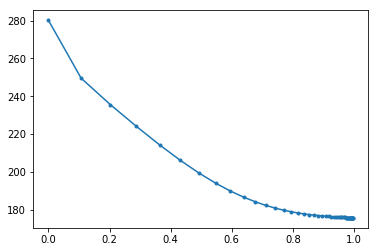

In [3]:
astate = amm.props2(P=0.01,x=0.998,Qu=0)
astate
import numpy
x_refrig = 1-numpy.logspace(0,-8,base=2)
T_min_cond = amm.props2v(P=0.01,x=x_refrig,Qu=0)[0]
import matplotlib.pyplot as plt
plt.plot(x_refrig, T_min_cond,'.-')
plt.show()

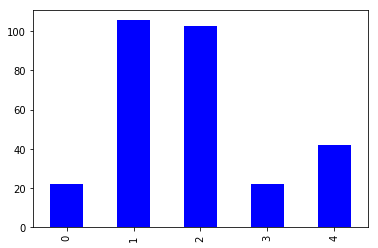

,T,P,x,h,s,u,v,Qu
rich_abs_outlet,310,4.75071,0.508281,-74.4766,0.391835,-75.0599,0.00122787,0
rich_pump_outlet,310.093,10.6161,0.508281,-73.5762,0.392416,-74.8794,0.0012276,-0.001
rich_shx_outlet,339.161,10.6161,0.508281,76.3836,0.851874,72.9667,0.00321857,0.0136051
rich_gen_sat_liquid,338.09,10.6161,0.508281,53.8805,0.785932,52.5292,0.00127282,0
weak_gen_outlet,380,10.6161,0.296492,278.322,1.35832,277.029,0.00121791,0
weak_shx_outlet,331.449,10.6161,0.296492,63.7467,0.754536,62.5309,0.00114525,-0.001
weak_exp_outlet,331.554,4.75071,0.296492,63.7467,0.756563,63.2024,0.00114571,-0.001
gen_vapor_outlet,338.09,10.6161,0.991505,1404.76,4.67404,1252.02,0.143873,1
gen_reflux_inlet,338.09,10.6161,0.508144,53.4903,0.784686,52.1388,0.00127304,0
refrig_rect_outlet,310,10.6161,0.9998,1319.41,4.40903,1183.88,0.127667,1.001


In [9]:
import pandas

class AquaChillerSpec1:
    T_abs = 300
    T_cond = 300
    T_evap = 278
    T_gen = 380
    T_rect = 310
    x_refrig = 0.9998
    Qu_evap = 0.998
    
    T_cond_max = None
    T_evap_min = None
    T_abs_max = None
    x_rich_max = None
    T_gen_min = None
    P_cond = None
    P_evap = None
    
    def __init__(self,T_abs=300,T_cond=300,T_evap=278,T_gen=380,T_rect=310,
                 x_refrig=0.9998,throws=False):
        self.T_abs = T_abs
        self.T_cond = T_cond
        self.T_evap = T_evap
        self.T_gen = T_gen
        self.T_rect = T_rect
        self.x_refrig = x_refrig
        self.messages=[]
        
    def cons(self):
        self.messages=[]
        result = pandas.Series(index=range(5))
        
        # Basics
        result[0] = (self.T_cond - self.T_evap)
        if result[0] < 0:
            self.messages.append("T_cond should be greater than T_evap but is not.")
        
        # convert mass fraction to molar only for Refprop
        x_molar_refrig = massFractionToMolar(self.x_refrig)
        self.T_cond_max = CP.PropsSI('Tcrit',
            'REFPROP::ammonia[{}]&water[{}]'.format(
            x_molar_refrig, 1 - x_molar_refrig))
        result[1] = (self.T_cond_max - self.T_cond)
        if result[1] < 0:
            self.messages.append("T_cond should be less than {:g} but is not.".format(self.T_cond_max))
        
        self.T_evap_min = amm.props2(P=0.01,x=self.x_refrig,Qu=0).T
        result[2] = (self.T_evap - self.T_evap_min)
        if result[2] < 0:
            self.messages.append("T_evap should be greater than {:g} but is not.".format(self.T_evap_min))
        
        self.P_cond = amm.props2(T=self.T_cond, x=self.x_refrig, Qu=0).P
        self.P_evap = amm.props2(T=self.T_evap, x=self.x_refrig, Qu=self.Qu_evap).P
        
        rich_liquid_max = amm.props2(T=self.T_abs,P=self.P_evap,Qu=0)
        self.x_rich_max = rich_liquid_max.x
        
        self.T_abs_max = T_abs_max_func(self.x_rich_max,
                                        P_abs_ammonia(self.x_rich_max, self.x_refrig, self.P_evap))
        result[3] = (self.T_abs_max - self.T_abs)
        if result[3] < 0:
            self.messages.append("T_abs should be less than {:g} but is not.".format(self.T_abs_max))
        
        self.T_gen_min = amm.props2(P=self.P_cond, x=self.x_rich_max, Qu=0).T
        result[4] = (self.T_gen - self.T_gen_min)
        if result[4] < 0:
            self.messages.append("T_gen should be greater than {:g} but is not.".format(self.T_gen_min))
        
        return result
    
    def _repr_html_(self):
        result = ""
        #result += """<h5>Inputs</h5>
        #    <ul><li>T_abs = {:g}</li><li>T_cond = {:g}</li><li>T_evap = {:g}</li>
        #    <li>T_gen = {:g}</li><li>T_rect = {:g}</li><li>x_refrig = {:g}</li></ul>""".format(
        #    self.T_abs, self.T_cond, self.T_evap, self.T_gen, self.T_rect, self.x_refrig)
        result += """<h5>Computed limits</h5>
            <ul><li>T_cond_max = {:g}</li><li>T_evap_min = {:g}</li>
            <li>P_cond = {:g}</li><li>P_evap = {:g}</li><li>x_rich_max = {:g}</li>
            <li>T_abs_max = {:g}</li><li>T_gen_min = {:g}</li></ul>""".format(
            self.T_cond_max, self.T_evap_min,
            self.P_cond, self.P_evap, self.x_rich_max,
            self.T_abs_max, self.T_gen_min)
        result += """<h5>Warnings</h5>
            <ul>{}</ul>""".format("".join(
            map(lambda msg: "<li>{}</li>".format(msg), self.messages)))
        return result
    

a1 = AquaChillerSpec1(T_abs=310)
cons = a1.cons()
display(a1)
colors = cons.map(lambda c: 'b' if c > 0 else 'r')
b = cons.plot.bar(color="".join(colors.tolist()))
plt.show()
ch = ammonia1.AmmoniaChiller()
ch.update(x_refrig=a1.x_refrig, T_evap=a1.T_evap, T_cond=a1.T_cond,
          T_abs_outlet=a1.T_abs, T_gen_outlet=a1.T_gen, T_rect=a1.T_rect)
display(ch)

In [10]:
%matplotlib inline
import ipywidgets as widgets
import widgetsnbextension
from ipywidgets import interactive

import system_aqua1
import ammonia1

common_opts = dict(
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)
w_m_rich = widgets.FloatSlider(
    value=0.5,
    min=0.1,
    max=2.0,
    step=0.05,
    description='m_rich',
    readout_format='.2f',
    **common_opts
)
w_T_evap = widgets.FloatSlider(
    value=278.0,
    min=240.0,
    max=290.0,
    step=0.1,
    description='T_evap',
    readout_format='.1f',
    **common_opts
)
w_T_cond = widgets.FloatSlider(
    value= 312.2,
    min=290,
    max=340,
    step=0.1,
    description='T_cond',
    readout_format='.1f',
    **common_opts
)
w_T_rect = widgets.FloatSlider(
    value=313.7,
    min=290.0,
    max=340.0,
    step=0.1,
    description='T_rect',
    readout_format='.1f',
    **common_opts
)
w_T_abs_outlet = widgets.FloatSlider(
    value=310.2,
    min=290.0,
    max=340.0,
    step=0.1,
    description='T_abs_outlet',
    readout_format='.1f',
    **common_opts
)
w_T_gen_outlet = widgets.FloatSlider(
    value=374.1,
    min=340.0,
    max=400.0,
    step=0.1,
    description='T_gen_outlet',
    readout_format='.1f',
    **common_opts
)
w_x_refrig = widgets.FloatSlider(
    value = 0.998,
    min = 0.99,
    max = 0.9999,
    step = 0.0001,
    description='x_refrig',
    readout_format='.4f',
    **common_opts
)
def f(m_rich, T_evap, T_cond, T_rect, T_abs_outlet, T_gen_outlet, x_refrig):
    
    a1 = AquaChillerSpec1(T_abs_outlet, T_cond, T_evap, T_gen_outlet, T_rect, x_refrig)
    cons = a1.cons()
    display(a1)
    colors = "".join(cons.map(lambda c: 'b' if c > 0 else 'r').tolist())
    b = cons.plot.bar(color=colors)
    plt.show()
    
    ch = ammonia1.AmmoniaChiller()
    ch.update(x_refrig=a1.x_refrig, T_evap=a1.T_evap, T_cond=a1.T_cond,
              T_abs_outlet=a1.T_abs, T_gen_outlet=a1.T_gen, T_rect=a1.T_rect)
    display(ch)
    
#widgets.VBox(w_m_rich,w_T_evap,w_T_cond,w_T_rect,w_T_abs_outlet,w_T_gen_outlet)
interactive(f,
            m_rich=w_m_rich,
            T_evap=w_T_evap,
            T_cond=w_T_cond,
            T_rect=w_T_rect,
            T_abs_outlet=w_T_abs_outlet,
            T_gen_outlet=w_T_gen_outlet,
            x_refrig=w_x_refrig
           )

A Jupyter Widget

In [36]:
# Parametric study / visualize infeasible regions
T_low = 270
T_med_range = numpy.linspace(290, 450, 10)
T_high_range = numpy.linspace(290, 450, 5)
violations = numpy.zeros((len(T_med_range),len(T_high_range)))
worst = violations.copy()
worst.fill(numpy.nan)

for (i,T_med) in enumerate(T_med_range):
    print("Case ",i)
    for (j,T_high) in enumerate(T_high_range):
        a1 = AquaChillerSpec1(T_abs=T_med, T_cond=T_med, T_gen=T_high)
        try:
            cons = a1.cons()
            v = min(cons)
            w = numpy.argmin(cons)
            violations[i,j] = v
            worst[i,j] = w
        except KeyError:
            pass
violations[violations>0] = numpy.nan

Case  0
Case  1
Case  2
Case  3
Case  4
Case  5
Case  6
Case  7
Case  8
Case  9


In [37]:
worst

array([[  4.,   3.,   3.,   3.,   3.],
       [  4.,   4.,   3.,   3.,   3.],
       [  4.,   4.,   4.,   4.,   3.],
       [  4.,   4.,   4.,   4.,   4.],
       [  4.,   4.,   4.,   4.,   4.],
       [  4.,   4.,   4.,   4.,   4.],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan]])

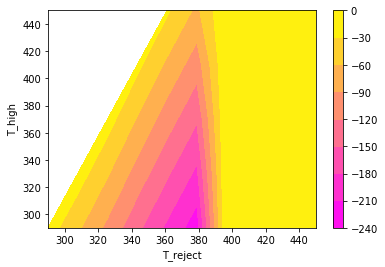

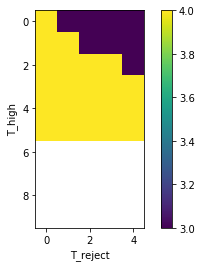

In [40]:
plt.figure()
plt.contourf(T_med_range, T_high_range, violations.T, cmap='spring')
plt.xlabel("T_reject")
plt.ylabel("T_high")
plt.colorbar()

plt.figure()
plt.imshow(worst)
#plt.contourf(T_med_range, T_high_range, worst.T, cmap='Pastel1', vmin=0, vmax=255 )
plt.xlabel("T_reject")
plt.ylabel("T_high")
plt.colorbar()

plt.show()

## Appendix

### Visualize relations between a few variables of state

In [1]:
import CoolProp
import CoolProp.CoolProp as CP
import numpy
from numpy import array, inf, nan
import matplotlib.pyplot as plt
T0, x0, Qu0 = 350., 0.8, 1.0
P0 = CP.PropsSI('P','T',T0,'Q',Qu0,"REFPROP::ammonia[{}]&water[{}]".format(x0,1.-x0))

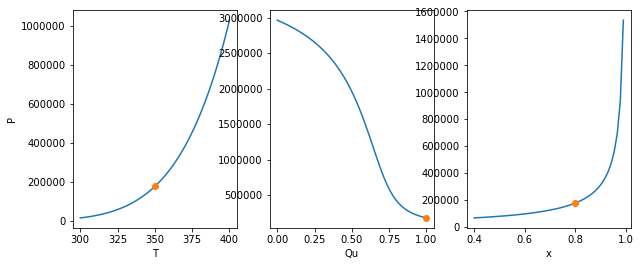

In [2]:
T = numpy.linspace(300,400)
Qu = numpy.linspace(0,1)
x = numpy.linspace(0.4,0.99)

plt.close('all')
fig = plt.figure(figsize=[10,4])

#CP.PropsSI('P','T',350, 'Q',1,"REFPROP::ammonia[0.1]&water[0.9]")
P_vs_T = CP.PropsSI('P','T',T,'Q',Qu0,"REFPROP::ammonia[{}]&water[{}]".format(x0,1.-x0))
fig.add_subplot(131)
plt.plot(T, P_vs_T)
plt.plot(T0, P0, 'o')
plt.xlabel('T')
plt.ylabel('P')

P_vs_Qu = CP.PropsSI('P','T',T0,'Q',Qu,"REFPROP::ammonia[{}]&water[{}]".format(x0,1.-x0))
fig.add_subplot(132)
plt.plot(Qu, P_vs_Qu)
plt.plot(Qu0, P0, 'o')
plt.xlabel('Qu')

P_vs_x = array([CP.PropsSI('P','T',T0,'Q',Qu0,"REFPROP::ammonia[{}]&water[{}]".format(xi,1.-xi))
                for xi in x])
fig.add_subplot(133)
plt.plot(x, P_vs_x)
plt.plot(x0, P0, 'o')
plt.xlabel('x')

plt.show()

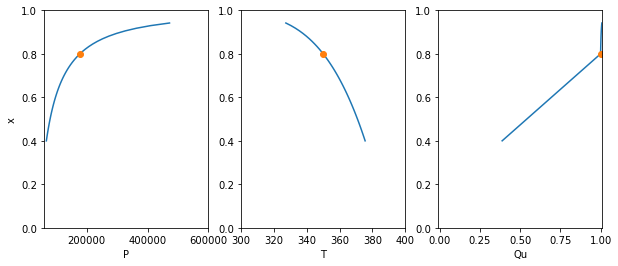

In [15]:
qt5 = False
if qt5:
    %matplotlib qt5
else:
    %matplotlib inline
plt.close('all')
fig = plt.figure(figsize=[10,4])
ax1=fig.add_subplot(131)
ax1.set_ylim(0,1)
ax1.set_xlim(6e4, 6e5)
ax1.set_ylabel('x')
ax1.set_xlabel('P')

ax2=fig.add_subplot(132)
ax2.set_ylim(0,1)
ax2.set_xlim(3e2, 4e2)
ax2.set_xlabel('T')

ax3=fig.add_subplot(133)
ax3.set_ylim(0,1)
ax3.set_xlim(-1e-2, 1+1e-2)
ax3.set_xlabel('Qu')

if qt5:
    ax1.plot(P0, x0, 'o')
    ax2.plot(T0, x0, 'o')
    ax3.plot(Qu0, x0, 'o')

pointopts = dict(color='grey', alpha=0.5, markersize=5.)

CPRP = CoolProp.AbstractState("REFPROP","ammonia&water")
PTQ = numpy.empty([3,len(x)])
PTQ.fill(nan)
try:
    for i,xi in enumerate(x):
        #print("Case", i, flush=True)
        if i > 45:
            continue
        CPRP.set_mole_fractions([xi,1-xi])
        try:
            CPRP.update(CoolProp.QT_INPUTS,Qu0,T0)
            pi = CPRP.p()
        except ValueError:
            pi = nan
            
        try:
            CPRP.update(CoolProp.PQ_INPUTS,P0,Qu0)
            ti = CPRP.T()
        except ValueError:
            ti = nan
            
        try:
            CPRP.update(CoolProp.PT_INPUTS,P0,T0)
            qi = CPRP.Q()
        except ValueError:
            qi = nan
        if qt5:
            ax1.plot(pi, xi, 'o', **pointopts)
            ax2.plot(ti, xi, 'o', **pointopts)
            ax3.plot(qi, xi, 'o', **pointopts)
            fig.canvas.draw()
            fig.canvas.flush_events()
        else:
            PTQ[:,i] = pi, ti, qi
except:
    pass

if not qt5:
    ax1.plot(PTQ[0,:], x)
    ax2.plot(PTQ[1,:], x)
    ax3.plot(PTQ[2,:], x)
    ax1.plot(P0, x0, 'o')
    ax2.plot(T0, x0, 'o')
    ax3.plot(Qu0, x0, 'o')

    plt.show()

In [57]:
# Absorber "Good case": P_evap is greater than the equilibrium P0; quality is lower than 1.
P_evap = P0 * 1.1
Qu_imagined = CP.PropsSI('Q','T',T0,'P',P_evap,"REFPROP::ammonia[{}]&water[{}]".format(x0,1.-x0))
Qu_imagined

0.9675526740934721

In [58]:
# Absorber "Bad case": P_evap is less than the equilibrium P0; quality is greater than 1.
P_evap = P0 * 0.9
Qu_imagined = CP.PropsSI('Q','T',T0,'P',P_evap,"REFPROP::ammonia[{}]&water[{}]".format(x0,1.-x0))
Qu_imagined

1.0005894260535513

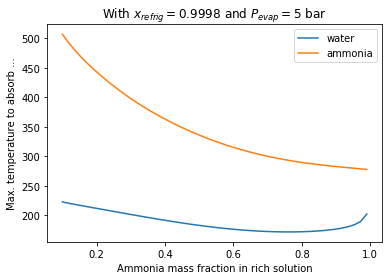

In [5]:
# Absorber: plotting T_abs,max vs x_rich to find maximum
def P_abs_water(x_rich,x_refrig,P_evap):
    x_molar_rich = massFractionToMolar(x_rich)
    x_molar_refrig = massFractionToMolar(x_refrig)
    alpha = (1 - x_molar_refrig) / (1 - x_molar_rich)
    result = alpha * P_evap
    return result

def P_abs_ammonia(x_rich,x_refrig,P_evap):
    x_molar_rich = massFractionToMolar(x_rich)
    x_molar_refrig = massFractionToMolar(x_refrig)
    #alpha = (1 - x_molar_refrig) / (1 - x_molar_rich)
    alpha = (x_molar_refrig) / (x_molar_rich)
    result = alpha * P_evap
    return result

def T_abs_max_func(x_rich,P_abs):
    return amm.props2(x=x_rich,P=P_abs,Qu=0,out='T')

x_refrig = 0.9998
P_evap = 5 # bar
x_rich = numpy.linspace(0.1,0.99)
T_abs_ammonia = numpy.empty_like(x_rich)
T_abs_ammonia.fill(numpy.nan)
T_abs_water = T_abs_ammonia.copy()

for i, x_rich_i in enumerate(x_rich):
    try:
        T_abs_ammonia[i] = T_abs_max_func(x_rich_i, P_abs_ammonia(x_rich_i, x_refrig, P_evap))
    except:
        pass
    try:
        T_abs_water[i] = T_abs_max_func(x_rich_i, P_abs_water(x_rich_i, x_refrig, P_evap))
    except:
        pass
plt.figure()
plt.title("With $x_{{refrig}}={}$ and $P_{{evap}}={}$ bar".format(x_refrig, P_evap))
plt.xlabel("Ammonia mass fraction in rich solution")
plt.ylabel("Max. temperature to absorb ...")
plt.plot(x_rich,T_abs_water,label="water")
plt.plot(x_rich,T_abs_ammonia,label="ammonia")
plt.legend()

plt.show()

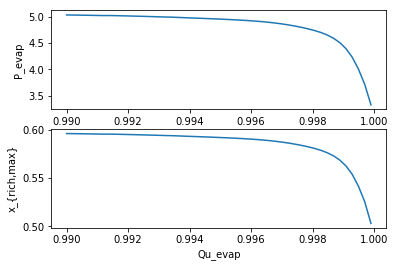

In [215]:
# What is the effect of vapor quality at evaporator outlet?
Qu_evap = numpy.linspace(0.99,0.9999)
T,P_evap,x,h,s,u,v,Qu=amm.props2v(T=278,x=0.9998,Qu=Qu_evap)
T,P,x_abs,h,s,u,v,Qu=amm.props2v(T=300,P=P,Qu=0)

fig=plt.figure()
ax1=fig.add_subplot(211)
ax1.set_ylabel('P_evap')
ax1.plot(Qu_evap,P_evap)

ax2=fig.add_subplot(212)
ax2.set_ylabel('x_{rich,max}')
ax2.set_xlabel('Qu_evap')
ax2.plot(Qu_evap,x_abs)
plt.show()

In [36]:
%%html
<textarea id="TOC-markdown" style="font-family:monospace;width:80%;height:20em;">TOC will be here</textarea>
<script>
$("#TOC-markdown").html(
    $('h1,h2,h3,h4').filter(":has(a)").map(function(){
        return "  ".repeat($(this).prop("tagName")[1]) 
          + "- <a href='" + encodeURI($(this).children().attr("href")) + "'>"
          + $(this).text() + "</a>";}).get().join("\n")
    );
</script>